In [1]:
pip install --upgrade matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os

print("Setup Complete")


Setup Complete


In [3]:
clean_df = pd.read_csv("Clean_Dataset.csv")
clean_df.shape

(300153, 12)

In [4]:
economy_df = pd.read_csv("business.csv")
economy_df.shape

(93487, 11)

In [5]:
business_df = pd.read_csv("economy.csv")
business_df.shape

(206774, 11)

In [6]:
clean_df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [8]:
clean_df.describe

<bound method NDFrame.describe of         Unnamed: 0   airline   flight source_city departure_time stops  \
0                0  SpiceJet  SG-8709       Delhi        Evening  zero   
1                1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2                2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3                3   Vistara   UK-995       Delhi        Morning  zero   
4                4   Vistara   UK-963       Delhi        Morning  zero   
...            ...       ...      ...         ...            ...   ...   
300148      300148   Vistara   UK-822     Chennai        Morning   one   
300149      300149   Vistara   UK-826     Chennai      Afternoon   one   
300150      300150   Vistara   UK-832     Chennai  Early_Morning   one   
300151      300151   Vistara   UK-828     Chennai  Early_Morning   one   
300152      300152   Vistara   UK-822     Chennai        Morning   one   

         arrival_time destination_city     class  duration  days_left  price 

In [9]:
clean_df1 = clean_df.groupby(['flight','airline'],as_index=False).count()
clean_df1.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

In [10]:
clean_df2 = clean_df.groupby(['flight','airline','class'],as_index=False).count()
clean_df2['class'].value_counts()

Economy     1560
Business     295
Name: class, dtype: int64

In [38]:
clean_df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

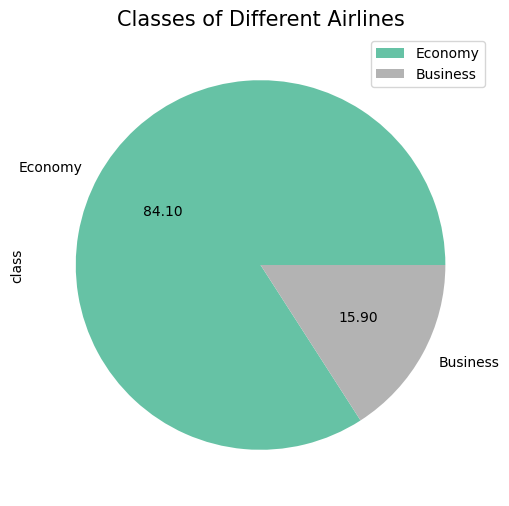

In [11]:
plt.figure(figsize=(8,6))
clean_df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='Set2')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

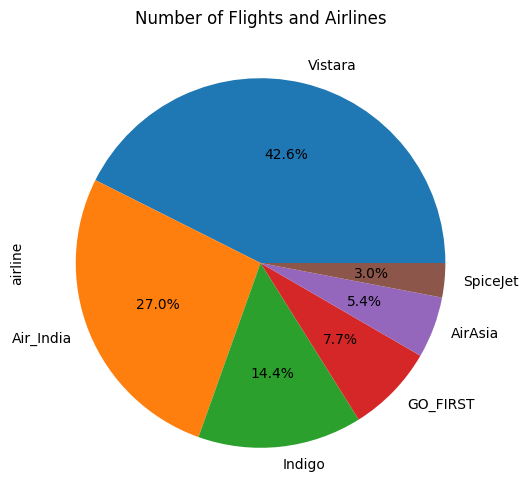

In [12]:
plt.figure(figsize=(16,6))
plt.title("Number of Flights and Airlines")
clean_df["airline"].value_counts().plot(kind ="pie",autopct='%1.1f%%');

In [13]:
city = clean_df["source_city"].value_counts()

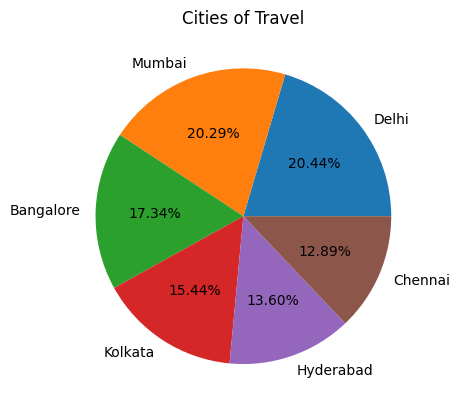

In [14]:
plt.pie(city.values,labels=city.index,autopct="%1.2f%%")
plt.title("Cities of Travel")
plt.show()

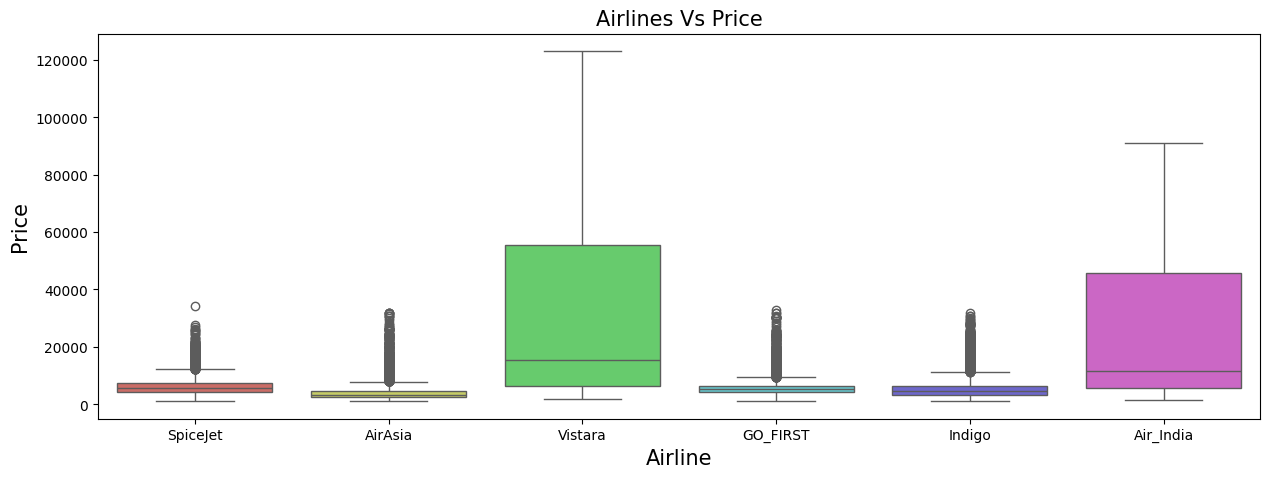

In [15]:
plt.figure(figsize=(15,5))
sns.boxplot(x=clean_df['airline'],y=clean_df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

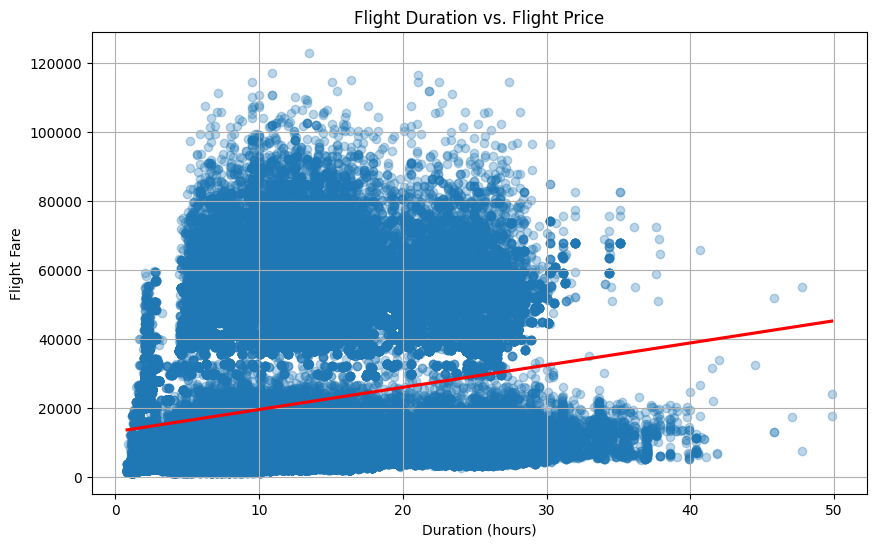

In [16]:
# Creating a scatter plot with a regression line

plt.figure(figsize=(10, 6))
sns.regplot(x='duration', y='price', data=clean_df, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'}, ci=None)
plt.title('Flight Duration vs. Flight Price')
plt.xlabel('Duration (hours)')
plt.ylabel('Flight Fare')
plt.grid(True)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Duration is the feature and Price is the target variable
X = clean_df['duration'].values.reshape(-1, 1)
y = clean_df['price'].values

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model with the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

print("Model: Linear Regression")

# Calculate R-squared Score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2:.2f}')

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse:.2f}')

Model: Linear Regression
R-squared Score: 0.04
Root Mean Squared Error: 22205.84


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Duration is the feature and Price is the target variable
X = clean_df[['duration']]
y = clean_df['price']

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree
regressor = DecisionTreeRegressor(random_state=42)

# Train the model
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Model: Decision Tree")

# R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2:.2f}')

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse:.2f}')

Model: Decision Tree
R-squared Score: 0.09
Root Mean Squared Error: 21611.50


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Duration is the feature and Price is the target variable
X = clean_df[['duration']]
y = clean_df['price']

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso Model
regressor = Lasso(alpha=0.1, random_state=42)

# Train the model
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Model: Lasso Regression")

# R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2:.2f}')

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse:.2f}')

Model: Lasso Regression
R-squared Score: 0.04
Root Mean Squared Error: 22205.84


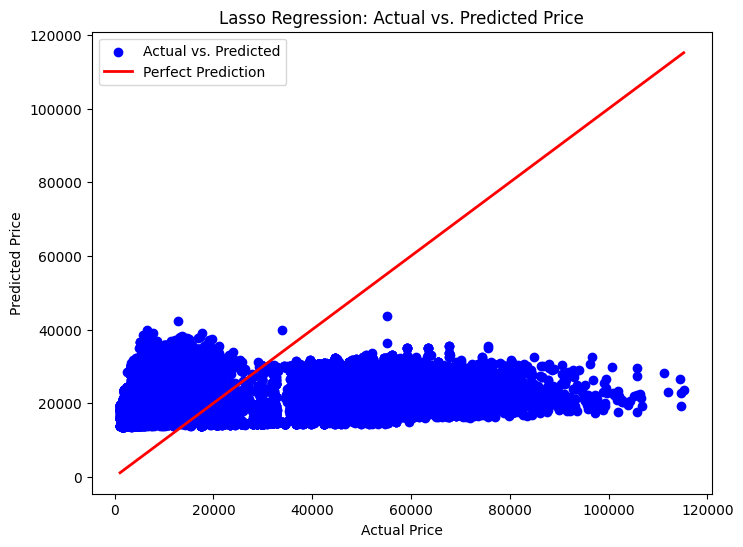

In [37]:
import matplotlib.pyplot as plt

# Plotting the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Lasso Regression: Actual vs. Predicted Price')
plt.legend()
plt.show()


In [20]:
clean_df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [21]:
clean_df = clean_df.drop(columns=['Unnamed: 0', 'flight'])

In [22]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB
